### Задачи <a name="tasks"></a>


**Задача 1**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

||||||
|---|---|---|---|:---:|
|$x_i$|0|1|2|3|
|$y_i$|5|6|4|100|


Критерий деления узла на два — минимизация $RSS$. Дерево строится до трёх терминальных узлов

Сначала импортируем библиотеки

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

Далее построем регрессионное дерево для прогнозирования на основе обучающей выборки

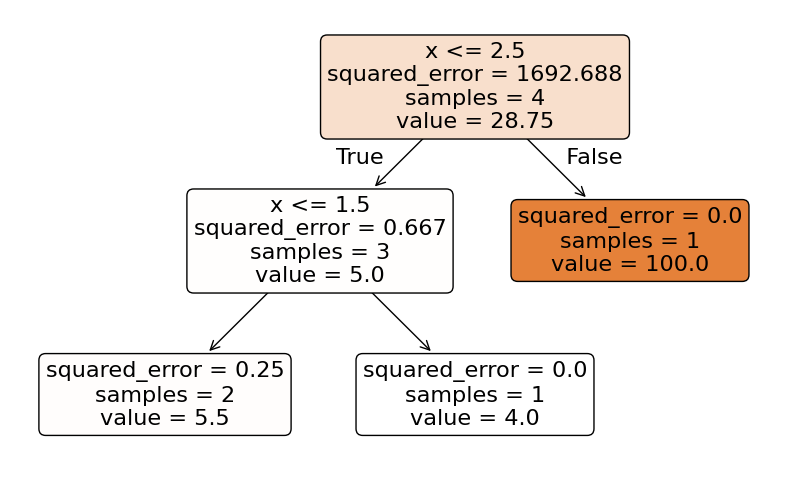

Предсказанные значения: [  5.5   5.5   4.  100. ]


In [65]:
# Обучающая выборка
X = np.array([0, 1, 2, 3]).reshape(-1, 1)
y = np.array([5, 6, 4, 100])

# Создание и обучение модели дерева регрессии
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# Построение дерева
plt.figure(figsize=(10, 6))
plot_tree(tree_reg, filled=True, feature_names=['x'], rounded=True)
plt.show()
predictions = tree_reg.predict(X)
print("Значения:", predictions)

**Задача 2**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

    
|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|100|1|
|102|2|
|103|3|
|50|4|
|55|5|
|61|6|
|70|7|

Критерий деления узла на два — минимизация $RSS$. Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.

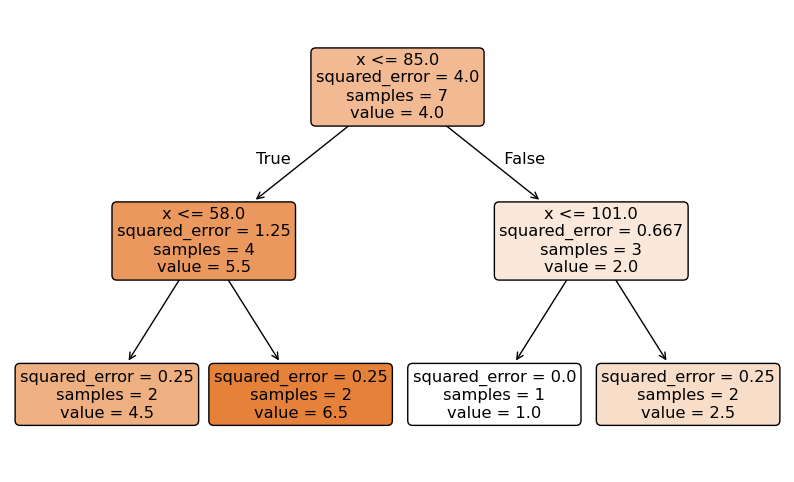

Значения: [1.  2.5 2.5 4.5 4.5 6.5 6.5]


In [67]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Обучающая выборка
X = np.array([100, 102, 103, 50, 55, 61, 70]).reshape(-1, 1)
y = np.array([1, 2, 3, 4, 5, 6, 7])

# Создание и обучение модели дерева регрессии
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# Построение дерева
plt.figure(figsize=(10, 6))
plot_tree(tree_reg, filled=True, feature_names=['x'], rounded=True)
plt.show()
predictions = tree_reg.predict(X)
print("Значения:", predictions)

Задача 3.

Дон-Жуан предпочитает брюнеток. Перед Новым Годом он посчитал, что в записной книжке у него 20 блондинок, 40 брюнеток, две рыжих и восемь шатенок. С Нового Года Дон-Жуан решил перенести все сведения в две записные книжки, в одну — брюнеток, во вторую — остальных.

Как изменились индекс Джини и энтропия в результате такого разбиения?

Для начала подключим библиотеки

In [ ]:
import math
from collections import Counter

Далее запишем количество людей и напишем функцию вычисления индекса Джини и энтропии

In [ ]:
# Исходные данные
blondines = 20
brugnetok = 40
ryzhie = 2
shatenki = 8

# Общее количество людей
total_people = blondines + brugnetok + ryzhie + shatenki

# Вычисление долей классов
p_blondines = blondines / total_people
p_brugnetok = brugnetok / total_people
p_ryzhie = ryzhie / total_people
p_shatenki = shatenki / total_people

# Вычисление индекса Джини и энтропии для исходного распределения
def gini_index(p):
    return sum([pi * (1 - pi) for pi in p])

def entropy(p):
    return -sum([pi * math.log2(pi) if pi > 0 else 0 for pi in p])

original_distribution = [p_blondines, p_brugnetok, p_ryzhie, p_shatenki]

После этого выполним условие задачи

In [9]:

ginindex_before = gini_index(original_distribution)
entropy_before = entropy(original_distribution)

# Разбиение на две записки
new_total_people = brugnetok + (blondines + ryzhie + shatenki)
p_other = (blondines + ryzhie + shatenki) / total_people
p_brugnetok_new = brugnetok / new_total_people

# Вычисление индекса Джини и энтропии после разбиения
other_distribution = [p_other, p_brugnetok_new]
ginindex_after = gini_index(other_distribution)
entropy_after = entropy(other_distribution)

print("Индекс Джини до разбиения:", ginindex_before)
print("Энтропия до разбиения:", entropy_before)
print("Индекс Джини после разбиения:", ginindex_after)
print("Энтропия после разбиения:", entropy_after)

Индекс Джини до разбиения: 0.5779591836734694
Энтропия до разбиения: 1.4819160784700844
Индекс Джини после разбиения: 0.4897959183673469
Энтропия после разбиения: 0.9852281360342515


Задача 4.

Приведите примеры наборов данных, для которых индекс Джини равен  0 ,  0.5  и  0.999 .

Запишем наборы данных для подбора индекса Джини

In [60]:
# Объекты одного класса
single_class_data = ['A'] * 9
# Объекты двух классов распределены равномерно
uniform_distribution_data = ['A'] * 9 + ['B'] * 9
# Абсолютное преобладание объектов одного класса
dominant_class_data = ['A'] + ['B'] * 9999

def gini_index(data, majority=False):
    class_counts = Counter(data)
    proportions = np.array(list(class_counts.values())) / len(data)
    if majority:
        return np.sum(proportions ** 2)
    else:
        return 1 - np.sum(proportions ** 2)

result_single_class = gini_index(single_class_data)
result_uniform_distribution = gini_index(uniform_distribution_data)
result_dominant_class = round(gini_index(dominant_class_data, majority=True), 4)

print(f"Джини 0: {result_single_class}")
print(f"Джини 0.5: {result_uniform_distribution}")
print(f"Джини 0.999: {result_dominant_class}")

Джини 0: 0.0
Джини 0.5: 0.5
Джини 0.999: 0.9998


**Задача 5**.

Машка пять дней подряд гадала на ромашке, а затем выкладывала очередную фотку «Машка с ромашкой» в инстаграмчик. Результат гадания — переменная $y_i$, количество лайков у фотки — переменная $x_i$. Постройте классификационное дерево для прогнозирования $y_i$ с помощью $x_i$ на обучающей выборке:

|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|плюнет|10|
|поцелует|11|
|поцелует|12|
|к сердцу прижмет|13|
|к сердцу прижмет|14|

Дерево строится до идеальной классификации. Критерий деления узла на два — максимальное падение индекса Джини.

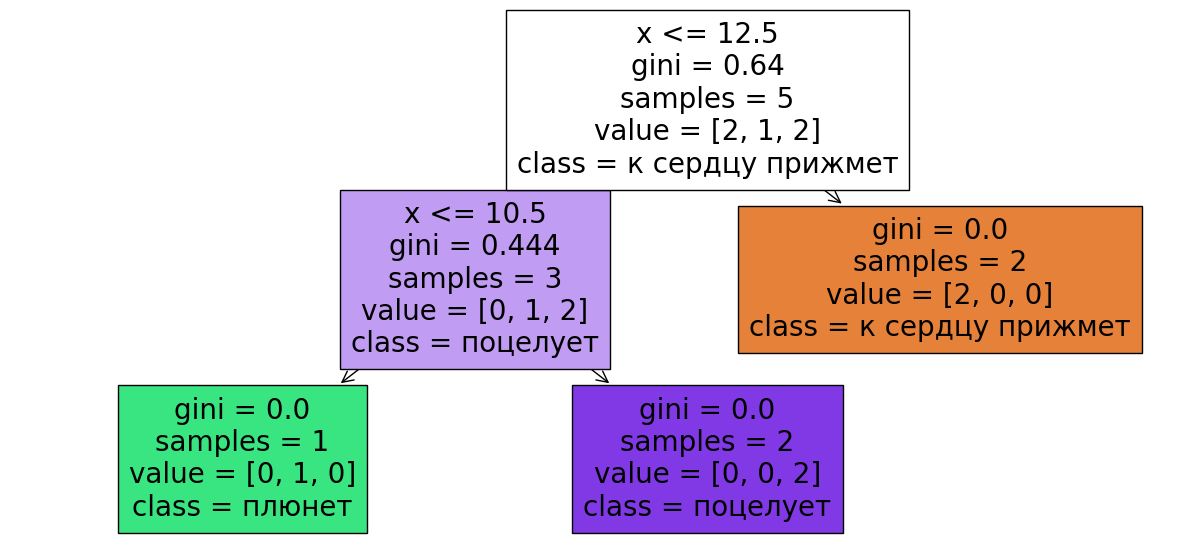

In [61]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Обучающая выборка
X = np.array([10, 11, 12, 13, 14]).reshape(-1, 1)  # Входная переменная
y = np.array(['плюнет', 'поцелует', 'поцелует', 'к сердцу прижмет', 'к сердцу прижмет'])  # Выходная переменная

# Создание и обучение модели Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, y)

# Визуализация дерева
plt.figure(figsize=(15, 7))
plot_tree(clf, filled=True, feature_names=['x'], class_names=clf.classes_)
plt.show()